In [1]:
#This Column for PIP Install:

In [54]:
#Import Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import os
import glob
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from skimage import io, transform
from PIL import Image
import cv2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from tensorflow.keras.applications import EfficientNetB0,EfficientNetB1,EfficientNetB7

# 1.  **Load the Data**

In [89]:
#Read the Aptos 2019 Dataset
aptosO_2019 = pd.read_csv('/kaggle/input/aptos2019-blindness-detection/train.csv')
aptosO_2019.shape
aptosO_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [21]:
#Read the Aptos 2015 Dataset(resize)
aptos_2015 = pd.read_csv('/kaggle/input/resized-2015-2019-blindness-detection-images/labels/trainLabels15.csv')
aptos_2015.shape
aptos_2015.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35126 entries, 0 to 35125
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   image   35126 non-null  object
 1   level   35126 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 549.0+ KB


In [ ]:
#Rename the 2015 data
aptos_2015.rename(columns={'image':'id_code','level':'diagnosis'},inplace=True)

In [19]:
#Read the Aptos 2019 Dataset(resize)
aptos_2019 = pd.read_csv('/kaggle/input/resized-2015-2019-blindness-detection-images/labels/trainLabels19.csv')
aptos_2019.shape
aptos_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3662 entries, 0 to 3661
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id_code    3662 non-null   object
 1   diagnosis  3662 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 57.3+ KB


In [15]:
aptos_2019.value_counts().sum()

3662

In [16]:
aptos_2015.value_counts().sum()

35126

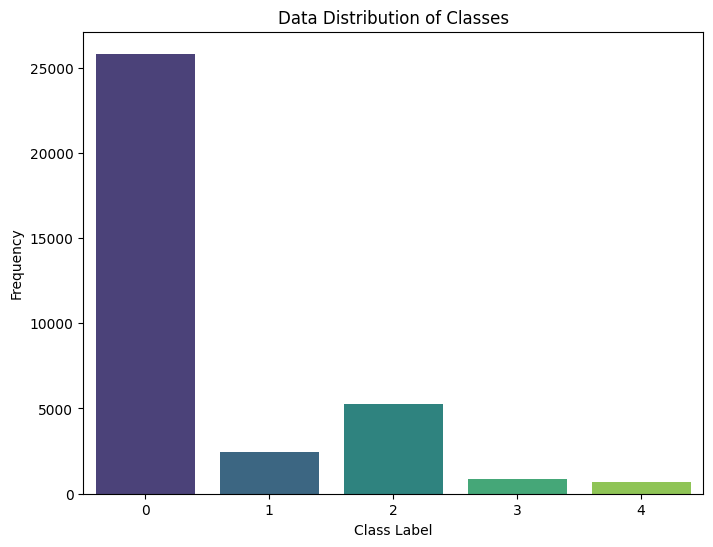

In [25]:
#Distribution Plot for 2015 resize
plt.figure(figsize=(8, 6))
sns.countplot(x="diagnosis", data=aptos_2015, palette="viridis")
plt.title("Data Distribution of Classes")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()

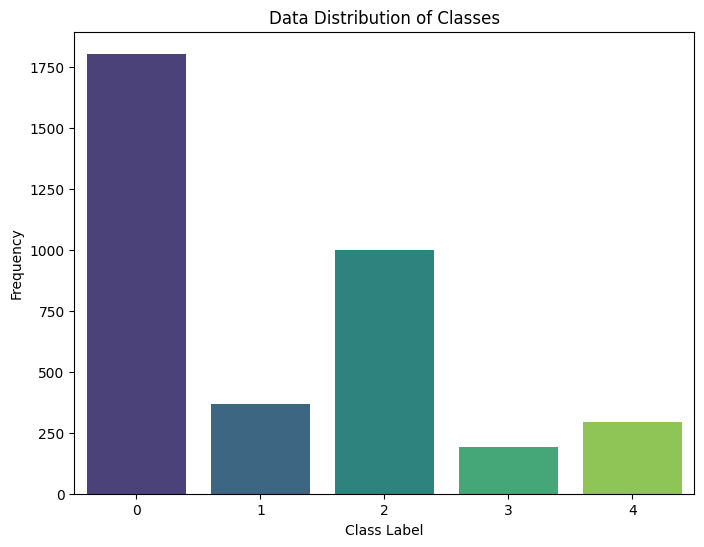

In [20]:
#Distribution Plot for 2019 resize
plt.figure(figsize=(8, 6))
sns.countplot(x="diagnosis", data=aptos_2019, palette="viridis")
plt.title("Data Distribution of Classes")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()

# 2. Merge The data  

In [36]:
# Concatenate row-wise (default for axis=0)
merge_data = pd.concat([aptos_2015, aptos_2019], ignore_index=True)
merge_data.to_csv("merge the data 2015 and 2019 Aptos.csv",index=False)


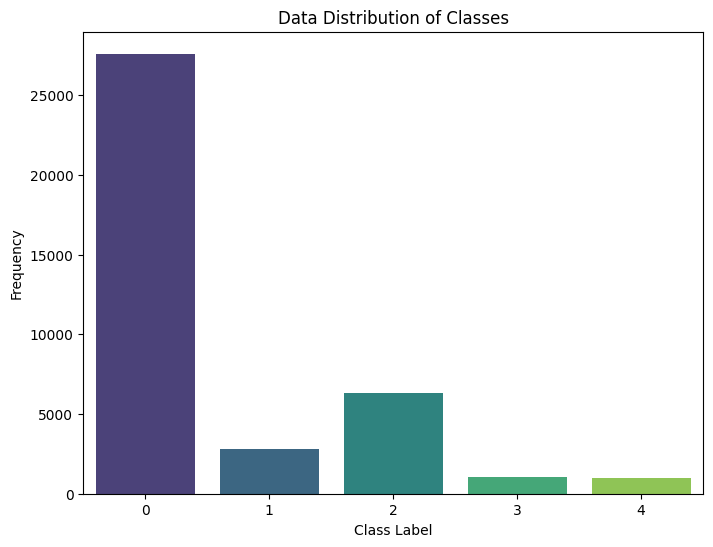

In [37]:
#Distribution Plot for 2019 resize
plt.figure(figsize=(8, 6))
sns.countplot(x="diagnosis", data=merge_data, palette="viridis")
plt.title("Data Distribution of Classes")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.show()

1. Slightly increased the data
2. there is No duplicated and null values 

# 3.  *PreProcessing*

In [52]:
WORKERS = 2
CHANNEL = 3
import warnings
warnings.filterwarnings("ignore")
IMG_SIZE = 512
NUM_CLASSES = 5
SEED = 77
TRAIN_NUM = 10

In [91]:
x = aptosO_2019['id_code']
y = aptosO_2019['diagnosis']

x, y = shuffle(x, y, random_state=SEED)

(3112,) (3112,) (550,) (550,)


<Axes: >

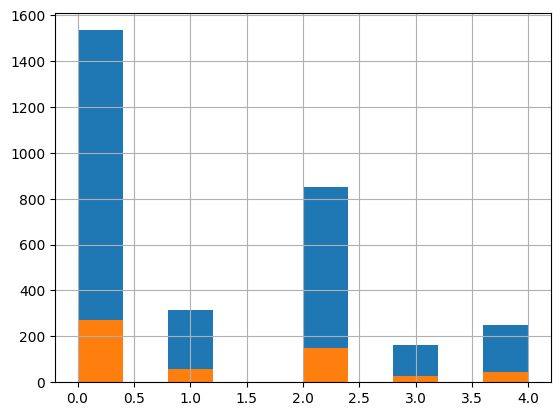

In [92]:
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.15,
                                                      stratify=y, random_state=SEED)
print(train_x.shape, train_y.shape, valid_x.shape, valid_y.shape)
train_y.hist()
valid_y.hist()